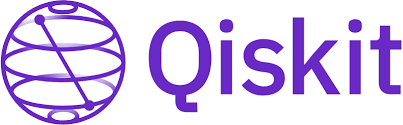

# Introduction to Qiskit.

In this tutorial we will learn how to create and implement quantum algorithms. With this purpose we will use Qiskit, a software development kit to work with quantum computers at the level of pulses, circuits, and application modules. It is developed by IBM and it allows to access their quantum devices. For more information about the devices available visit https://quantum-computing.ibm.com/. For a comprehensive tutorial check out the [Qiskit Textbook](https://qiskit.org/learn/).

## 0. Installation

For the installation of the last version of Qiskit, use  `pip install qiskit`.

## 1. Quantum states

Until now we have defined a qubit as a two level system whose quantum state is given by
$$|\psi\rangle = \alpha |0\rangle + \beta |1\rangle, \quad |\alpha|^2 + |\beta|^2.$$

There is an alternative representation in terms of the angles $\theta$ and $\phi$ 
$$|\psi\rangle = \cos(\theta)|0\rangle + \sin(\theta) e^{i\phi}|1\rangle = \begin{bmatrix} \cos(\theta) \\ \sin(\theta) e^{i\phi} \end{bmatrix},$$
which allows us to define a geometric representation of the space of states, the Bloch sphere. 

We can represent a quantum state as a point on the Bloch sphere. For example, let us consider the following quantum states,


$$ |\psi_1\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0   \end{bmatrix},$$

$$ |\psi_2\rangle = \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle ) = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1   \end{bmatrix},$$

$$ |\psi_3\rangle = \frac{1}{\sqrt{2}}( |0\rangle + i |1\rangle ) \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i   \end{bmatrix}.$$


In [ ]:
import numpy as np

In [ ]:
ψ1 = [1, 0]
ψ2 = [1/np.sqrt(2), 1/np.sqrt(2)]
ψ3 = [1/np.sqrt(2), 1j/np.sqrt(2)]

Now, we import the function to plot the Bloch sphere representation of each quantum state.

In [ ]:
from qiskit.visualization import plot_bloch_multivector

In [ ]:
plot_bloch_multivector(ψ1)

In [ ]:
plot_bloch_multivector(ψ2)

In [ ]:
plot_bloch_multivector(ψ3)

The Bloch sphere is only valid for the representation of single-qubit states. For multiple-qubit state we need to resort to ther representations, such as the [qsphere](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html).

## 2. Basic elements

### 2.1. Quantum circuits and registers

The first element that we need to implement a quantum algorithm is the `QuantumCircuit` class, which allows us to create a quantum circuit. To define the quantum circuit we need to specify the number of qubits and classical bits (clbits) of the register. The qubits define the quantum state on which the quantum operations are applied, while the clbits store the classical information obtained as outcome of the measurement. To define the qubits and the clbit we use the `QuantumRegister` and `ClassicalRegister` classes, respectively.

Let us start by creating the simplest quantum circuit, the one-qubit quantum circuit.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [ ]:
#Create the registers
reg_cuant = QuantumRegister(1, name='qubit')    #Quantum register 'qubit'
reg_clas  = ClassicalRegister(1, name='clbit')  #Classical register 'clbit'
qc = QuantumCircuit(reg_cuant, reg_clas) #Create quantum circuit

We can visualize the circuit using the `draw` function. 

In [ ]:
#Use draw function with matplotlib ('mpl') option 
qc.draw(output='mpl') 

How do we know in which state is our circuit? In Qiskit the default state for all the qubits is the $|0\rangle$. How do we check this? A good way to do this is is using the `Statevector` function.

In [ ]:
from qiskit.quantum_info import Statevector

In [ ]:
qc_state = Statevector(qc)
print(qc_state)
plot_bloch_multivector(qc_state)

As mentioned before, the initial state of the one-qubit quantum circuit corresponds to the $|0\rangle$ state.

### 2.2. Quantum gates

Now that we know how to construct a quantum circuit representing one or more qubits, we need to move on to the next step, that is modifying the state of the qubits. This is done by means of quantum gates. The `QuantumCircuit` class has several functions defined to apply them.

Let us start with the $X$ gate,

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, $$

that allows us to negate the state of the qubit,

$$ X|0\rangle = |1\rangle, \quad X|1\rangle = |0\rangle. $$

In [ ]:
qc.x(0)
qc.draw( output='mpl' )

In [ ]:
qc_state = Statevector(qc)
print(qc_state)
plot_bloch_multivector(qc_state)

So now we observe that the state has been negated, as expected. What is we applied the $X$ gate again?

In [ ]:
qc.x(0)
qc.draw( output='mpl' )

In [ ]:
qc_state = Statevector(qc)
print(qc_state)
plot_bloch_multivector(qc_state)

Now we are back to the initial state! This is because $XX = \mathbb{I}$. However, we have an analogous classical operation, the $\text{NOT}$ gate. Where comes the quantumness?

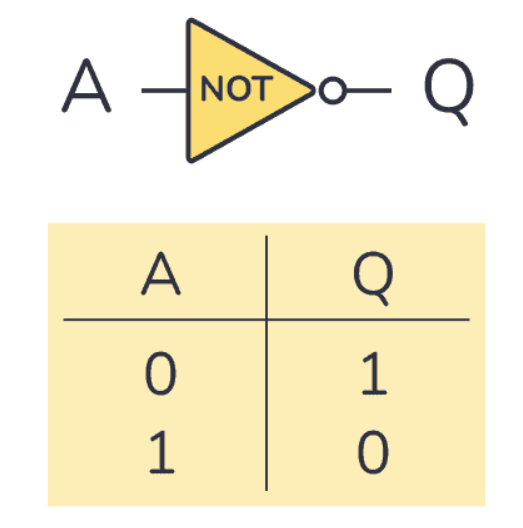

The Hadamard gate $H$,
$$ H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}, $$
produces a state in superposition

When we apply it on the basis quantum states $\lbrace |0\rangle, |1\rangle\rbrace$ we obtain 

$$ H|0\rangle = \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle  ), \quad H|1\rangle = \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle  ). $$

In [ ]:
#If you don't want to use registers, they are automatically created with a generic name
qc = QuantumCircuit(1,1)
qc.h(0)
qc.draw( output='mpl' ) 

In [ ]:
qc_state = Statevector(qc)
print(qc_state)
plot_bloch_multivector(qc_state)

Now we have a superposition! We observe that this is one of the basis states along the $x$-axis.

We can also modify the basis of the state using the $Z$ gate,

$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}, $$

$$ Z|0\rangle = |0\rangle, \quad Z|1\rangle = -|1\rangle. $$

Applying it on a state in superposition we can change its local phase

$$ Z\left( \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle  )  \right) = \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle  ). $$

In [ ]:
# We define a quantum circuit with only a quantum register
qc = QuantumCircuit(1)  
qc.h(0)
qc.z(0) 
qc.draw( output='mpl' ) 

In [ ]:
qc_state = Statevector(qc)
print(qc_state)
plot_bloch_multivector(qc_state)

The phase has now changed.

Until now we have been working with just one qubit. However, we need more qubits to make things more interesting. A very important gate it the controlled-not gate, the $CX$ (also known as $\text{CNOT}$),

$$ CX = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 1 & 0 \end{bmatrix}. $$

This quantum gate introduces entanglement between two qubits. For a two-qubit state $|t,c\rangle,$ the target qubit $|t\rangle$ is negated if the control qubit $|c\rangle$ is in the $|1\rangle$ state,

$$CX|00\rangle = |00\rangle $$
$$CX|01\rangle = |11\rangle $$
$$CX|10\rangle = |10\rangle $$
$$CX|11\rangle = |01\rangle $$

Before continuing we have to make an important remark. Qiskit represents the qubits from the most to the least significative one as $|q_{n-1} \dots q_{0}\rangle$, so the first qubit $q_0$ is the least significative, as opposed to the most common convention.

In [ ]:
qc = QuantumCircuit(2) 
qc.cx(control_qubit=0, target_qubit=1)
qc.draw(output='mpl') 

In [ ]:
qc_state = Statevector(qc)
print(qc_state)

Nothing happens to the state since the control qubit is in the $|0\rangle$ state. Let us now run the following circuit.

In [ ]:
qc = QuantumCircuit(2) 
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
qc.draw(output='mpl') 

In [ ]:
qc_state = Statevector(qc)
print(qc_state)

This corresponds to the following entangled state
$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |00\rangle + |11\rangle ). $$
Since the control qubit is in superposition it creates an entangled state. This is one of the Bell states.

## 3. Run a quantum circuit

How do we extract the information out of a quantum circuit? We have mentioned that the quantum circuit is in a quantum state that can be modified by the application of quantum gates (as we have already seen). If we want to obtain information out of a quantum circuit about this quantum state we need to run the circuit in a backend. This is done using Qiskit's `Sampler`.

In [ ]:
from qiskit.primitives import Sampler

This is the new way of doing things in Qiskit. Before we directly used a backend to run the circuit, and here there is a list of the available ones (still working but soon to be deprecated!). 

In [ ]:
from qiskit import Aer
Aer.backends()

### 3.1. Exact probability simulator

We can first use the `Sampler` to recover the exact probabilities encoded in the quantum circuit by not providing shots (`shots=None`) to it. To obtain this we would need infinite shots, but it is useful to check that the code works or to test its performance for an ideal infinite measurents case.

In [ ]:
# Define sampler
sampler = Sampler()
# Define circuit
qc = QuantumCircuit(2,2) 
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
# Measure quantum circuit
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl') 

In [ ]:
# Obtain results
result = sampler.run(qc).result()
exact_probs = result.quasi_dists[0]
print(exact_probs)

The exact state would be 
\begin{equation*}
|\psi\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle,
\end{equation*}
with probabilities $p_{00}=p_0=0.5, \ p_{11} = p_3=0.5$, as we have obtained.

We can also represent the results as probabilities in a histogram.

In [ ]:
from qiskit.visualization import plot_distribution

In [ ]:
#Plot quasi-probabilities
plot_distribution(exact_probs)

### 3.2. Ideal quantum computer simulator

In practice it is impossible to measure the exact quantum state due to the principle of superposition, as when we measure the state we obtain one of the states of the superposition. This is a probabilistic measure and to recover the probability distribution of the quantum state we need to repeat this measure a sufficiently larger number of times, which are called `shots`. To measure the qubits we will use the `measure` function, that specifies which qubit are we measuring and in which classical register we store the information.

In [ ]:
# Define circuit
qc = QuantumCircuit(2,2) 
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
# Add measurements
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl') 

In [ ]:
# Obtain results
result = sampler.run(qc, shots=1024).result()
probs = result.quasi_dists[0]
print(probs)

We have the same quantum circuit as before, but now the results are the probabilities of measuring each possible state. Ideally the probability of these states should be $p_{00}=p_{11}=0.5$. However, since the measurement is probabilistic, we do not exactly obtain this. By increasing the number of measurements we get closer to this distribution.

We can also represent the results as probabilities in a histogram.

In [ ]:
#Plot counts
plot_distribution(probs)

If we increase the number of shots we get closer to the exact probability distribution.

In [ ]:
# Define circuit
qc = QuantumCircuit(2,2) 
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
# Add measurements
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl') 
# Obtain results
result = sampler.run(qc, shots=1000000).result()
probs = result.quasi_dists[0]
#Plot counts
plot_distribution(probs)

The sampler allows you a lot of flexibility to mimic a certain device. We can modify many parameters of the execution, such as the number of shots, or the properties of the simulated backend (noise channels, coupling map, basis gates...). We can even use a simulator of a concrete real device based on this backend and apply error mitigation techniques.

### 3.3. Real quantum computer

Now is time to try a real quantum computer! Using Qiskit is possible to access IBM's quantum computers. To do that you need to create an account in https://quantum-computing.ibm.com/. This is free and allows you to access some of their quantum devices and also use interesting tools.

First you need to install the qiskit-ibm-provider package via `pip install qiskit-ibm-provider`.

In [ ]:
from qiskit_ibm_provider import IBMProvider

#IBMProvider.save_account("c5bcf2ee6e24d795fa33a17691d0ad5b26e3a7950cc4262988a0f4397e94037b5d19718f76d43e7a99499b4dda7ba76922b70dbf02112dc8ef972d501f3c8ea1") #Save your account using the token provided at the website.
provider = IBMProvider()

Using our `provider` we can check the devices and cloud simulators that we can use.

In [ ]:
provider.backends()

Now, let us try to run a quantum circuit in a real device.

In [ ]:
from qiskit.primitives import BackendSampler

# Define backend
backend = provider.get_backend("ibm_lagos")
sampler = BackendSampler(backend) # Using BackendSampler you can obtain the Sampler interface of any backend
# Define circuit
qc = QuantumCircuit(2,2) 
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
# Add measurements
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl') 

Before running our circuit in a real device it is transpiled into the basis gates of that quantum computer.

In [ ]:
backend.configuration().basis_gates

In [ ]:
from qiskit import transpile
#Transpile quantum circuit to chosen backend
qc_transpiled = transpile(qc, backend=backend)
qc_transpiled.draw(output='mpl')

After transpilation the Hadamard gate is applied using two $R_Z$ rotations and the $\sqrt{X}$ gate.

We can now run the circuit in the real device.

In [ ]:
job = sampler.run(qc_transpiled, shots=1024)

Now our circuit is queued for execution and we can check the ID and its status.

In [ ]:
print(job.job_id())
print(job.status())

In [ ]:
result = job.result()
print(f">>> {result}")
print(f"  > Quasi-distribution: {result.quasi_dists[0]}")

Para extraer las cuentas experimentales hacemos exactamente lo mismo que antes para las simulaciones.

In [ ]:
counts_exp = job.result().quasi_dists[0]
print(counts_exp)
plot_distribution(counts_exp)

Now we observe that we obtain results that were not possible in theory. Why? This is because sadly current quantum computers are affected by noise, and this leads to errors in the computations. People are working hard to create fault-tolerant quantum computers capable of removing the effect of noise. However, in the meantime, we are trying to make the most out of current devices using error mitigation or hybrid schemes.

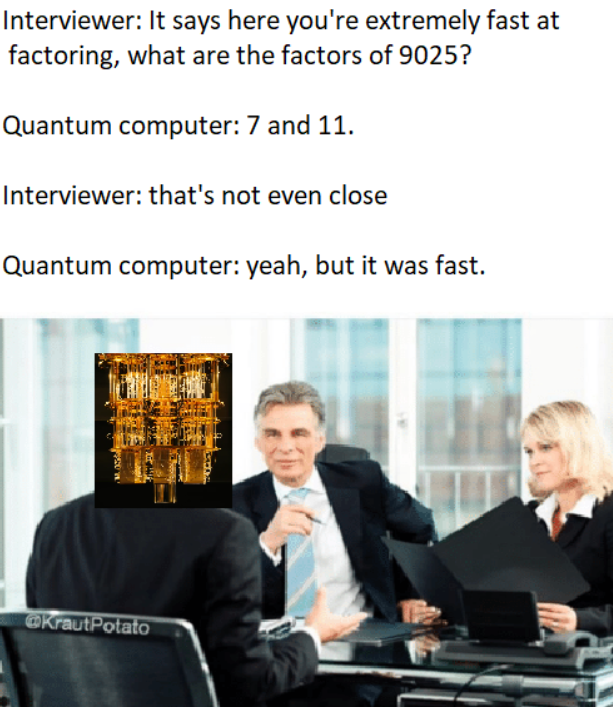

## 4. Grover's algorithm

Grover's algorithm, proposed by Lov Grover in 1996, provides a quantum advantage in the unstructured search problem. Consider that we want to search for an element $w$ within a list of $N$ elements. We could solve this problem classically by checking each element of the list until $w$ is found, such that on average $N/2$ evaluations of the list are required to find $w$. In the worst case we need $N$ evaluations. On the contrary, Lov Grover showed that there exists a quantum algorithm that can find $w$ with only $O(\sqrt{N})$ evaluations, which provides a quadratic speed-up with respect to the classical solution.

<img src="https://raw.githubusercontent.com/LucianoPereiraValenzuela/ECC_UDEC_2023/31422fc85438a068ca2b1281667d760a624bb29e/03%20Algoritmo%20de%20Grover/img/lista_elementos.png" width="900"/>

### 4. 1. Initial state 

The system is initially prepared in a uniform superposition state
$$
 |s\rangle = H^{\otimes n}|0\rangle^{\otimes n} = \frac{1}{\sqrt{2^{n}}}\sum_{x=0}^{2^n-1}|x\rangle.
$$

<img src="https://raw.githubusercontent.com/LucianoPereiraValenzuela/ECC_UDEC_2023/31422fc85438a068ca2b1281667d760a624bb29e/03%20Algoritmo%20de%20Grover/img/step%201.png" width="900"/>


### 4.2. Oracle

An _oracle_ is a quantum circuit that implement a function. For this case, the oracle is given by

$$
U_f|x\rangle=\left\{\begin{aligned}
|x\rangle & \text { if } x \neq w\\
-|x\rangle & \text { if } x=w
\end{aligned}\right.
$$

where $x$ is a bit string. This operator corresponds to a reflection of the vector $|s\rangle$ with respect to the vector $|s'\rangle$ (see figure), so that it adds a negative sign in the component proportional to $|w\rangle$,


<img src="https://raw.githubusercontent.com/LucianoPereiraValenzuela/ECC_UDEC_2023/31422fc85438a068ca2b1281667d760a624bb29e/03%20Algoritmo%20de%20Grover/img/step%202.png" width="900"/>

### 4.3. Amplification

The final step is the amplitication. This is carried out appliying the operation

$$U_s = 2|\psi_0\rangle\langle\psi_0|-\mathbb{I}= H^{\otimes n} [2(|0\rangle\langle 0|)^{\otimes n} -\mathbb{I}] H^{\otimes n}, $$

called _diffuser_. Analogous to the previous step, this is a reflection of the vector $|\psi_1\rangle$, but with respect to the state $|s\rangle$. This step amplifies the component of $|\psi_0\rangle$ proportional to $|w\rangle$.

<img src="https://raw.githubusercontent.com/LucianoPereiraValenzuela/ECC_UDEC_2023/31422fc85438a068ca2b1281667d760a624bb29e/03%20Algoritmo%20de%20Grover/img/step%203.png" width="900"/>

### 4.4. Quantum Circuit 

The quantum circuit of the Grover algorithm is shown in the following figure. The oracle and the diffuser must be repeated $O(\sqrt{N})$ times to find the bit string $w$.

<img src="https://raw.githubusercontent.com/LucianoPereiraValenzuela/ECC_UDEC_2023/31422fc85438a068ca2b1281667d760a624bb29e/03%20Algoritmo%20de%20Grover/img/complete%20circuit.png" width="900"/>

In [ ]:
def Grover( iter, num_qubit, w ):

    ## initial state
    qc = QuantumCircuit( num_qubit, num_qubit )  
    qc.h( range(num_qubit) )
    qc.barrier()

    for _ in range(iter):
        
        # oracle
        U = [ 1 for _ in range(2**num_qubit) ]
        U[int(w,2)]= -1 
        qc.diagonal( U, [ j for j in range(num_qubit)] )
        qc.barrier()

        # amplification
        U = [ -1 for _ in range(2**num_qubit) ]
        U[0]= 1
        qc.h(range(num_qubit))
        qc.diagonal( U, [ j for j in range(num_qubit)])
        qc.h(range(num_qubit))
        qc.barrier()

    qc.measure(range(num_qubit),range(num_qubit))

    return qc



### The quantum circuit for $n=3$ and $w=011$ is the following:

In [ ]:
n  = 3 
w = '011'

qc = Grover( 1, n, w)

qc.draw('mpl')

### Calling the _Sampler_ to execute the circuits.

In [ ]:
sampler = Sampler()
shots   = 1000

### For a single repetition:

In [ ]:
from qiskit.visualization import plot_histogram 

In [ ]:
qc = Grover(1, n, w)
results = sampler.run(qc, shots=shots)
probs   = results.result().quasi_dists[0].binary_probabilities()
plot_histogram( probs )

### For two repetitions, which is the optimal value:

In [ ]:
qc = Grover(2, n, w)
results = sampler.run(qc, shots=shots)
probs   = results.result().quasi_dists[0].binary_probabilities()
plot_histogram( probs )

### For three repetitions, the results become worse:

In [ ]:
qc = Grover(3, n, w)
results = sampler.run(qc, shots=shots)
probs   = results.result().quasi_dists[0].binary_probabilities()
plot_histogram( probs )

## 5. Quantum computing applications with Qiskit

### 5.1. Qiskit Algorithms
Grover search, phase estimation, time evolutions, variational algorithms, classical optimizers

In [ ]:
from qiskit.algorithms import Grover, PhaseEstimation
from qiskit.algorithms.time_evolvers import TimeEvolutionProblem, TrotterQRTE 
from qiskit.algorithms.minimum_eigensolvers import VQE, QAOA
from qiskit.algorithms.optimizers import SPSA 

### 5.2. Qiskit Nature
Electronic and vibrational structures.

In [ ]:
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

### 5.3. Qiskit Optimization
Quadratic optimization problems: Max-cut and travelling salesman problem.

In [ ]:
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit_optimization.algorithms import GroverOptimizer

### 5.4. Qiskit Finance
Portafolio optimization and Credit Risk Analysis.

In [ ]:
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table